In [21]:
from dash import Dash, html, dcc, callback, Output, Input
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib as plt

In [ ]:
app = Dash()
now = pd.to_datetime("today").strftime('%Y-%m-%d')

app.layout = [
    html.Div([html.H1('Thai SET Interactive Stock Dashboard'),
    html.P('Here are some Thai SET tickers you can choose from: 1. PTT, 2. SCB, 3. CPALL'),
    
    #ทำการให้เลือก Dropdown ลงมา
    dcc.Dropdown(  
        id="stock-dropdown",
        options=[
            {"label": "PTT", "value": "PTT.BK"},
            #{"label": "SCB", "value": "SCB.BK"},
            #{"label": "CPALL", "value": "CPALL.BK"}
        ],
        multi=True,
        value=["PTT.BK"] #"SCB.BK", "CPALL.BK"]  # เริ่มต้นเลือกหุ้น 3 ตัวนี้
    ),
    dcc.Graph(id="main-graph")
    ])
]

@app.callback(
    Output("main-graph", "figure"),
    Input("stock-dropdown", "value")
)
def update_graph(stock):
    if not stock:
        return {}
    if stock[0] == 'PTT.BK':
        df = yf.download("PTT.BK", start="2025-01-01", end=now)
    
    # สร้าง subplots สำหรับการแสดงผล
    fig = 
    
    return fig




In [34]:
import plotly.io as pio
pio.renderers.default = "browser"
fig = update_graph("PTT.BK")
fig.show()

In [8]:
df = yf.download("PTT.BK", start="2025-01-01", end=now)

[*********************100%***********************]  1 of 1 completed

In [9]:
df

Price,Close,High,Low,Open,Volume
Ticker,PTT.BK,PTT.BK,PTT.BK,PTT.BK,PTT.BK
Date,,,,,
2025-01-02,30.418549,30.658065,30.179032,30.418549,15869400
2025-01-03,30.658064,30.658064,30.418548,30.418548,11683300
2025-01-06,30.658064,31.137096,30.658064,30.897580,21436600
2025-01-07,30.658064,30.658064,30.179032,30.658064,27710300
2025-01-08,30.179031,30.658064,30.179031,30.658064,23137600
...,...,...,...,...,...
2025-03-31,32.000000,32.250000,31.500000,32.000000,40124600
2025-04-01,32.000000,32.250000,31.750000,32.000000,24892400


[*********************100%***********************]  1 of 1 completed

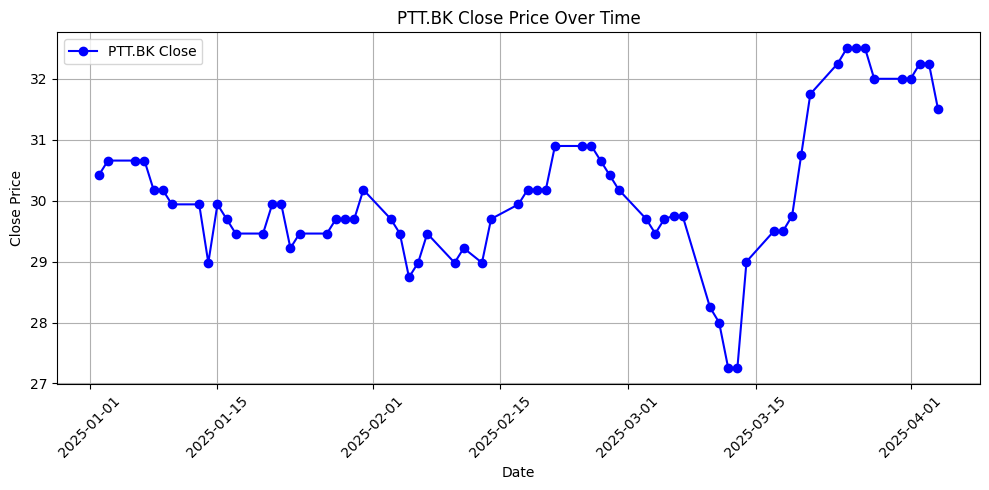

In [40]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# กำหนดช่วงวัน
start_date = "2025-01-01"
end_date = pd.to_datetime("today").strftime('%Y-%m-%d')

# ดาวน์โหลดข้อมูลจาก Yahoo Finance
df = yf.download("PTT.BK", start=start_date, end=end_date)

# Plot ค่าปิด (Close)
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], marker='o', linestyle='-', color='b', label='PTT.BK Close')
plt.title('PTT.BK Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from dash import Dash, Output, html, dcc, Input
import dash_bootstrap_components as dbc
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots  ## <-- เพิ่ม make_subplots สำหรับ subplot

# สร้าง Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
server = app.server

# ตั้งค่าช่วงเวลาเริ่มต้น
start_date = "2024-01-01"
end_date = pd.to_datetime("today").strftime('%Y-%m-%d')

# กำหนดหุ้นไทยที่ใช้
tickers = ["PTT.BK", "CPALL.BK", "SCB.BK"]

# Layout ของ Dash
app.layout = dbc.Container([
    html.Div([
        html.H1("ThaiSET", className='Topic', style={'textAlign': 'center'})
    ]),

    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='category',
                value=[tickers[0]],
                multi=True,
                clearable=False,
                options=[{'label': ticker, 'value': ticker} for ticker in tickers]
            )
        ], width=4),

        dbc.Col([
            dcc.DatePickerRange(
                id='date-picker-range',
                start_date=start_date,
                end_date=end_date,
                display_format='YYYY-MM-DD',
                style={'width': '100%'}
            )
        ], width=4)
    ], justify='between', className='my-3'),

    dbc.Row([
        dbc.Col([
            dcc.Graph(id='line-graph-plotly')
        ])
    ])
], fluid=True)

# Callback สำหรับอัปเดตกราฟ
@app.callback(
    Output(component_id='line-graph-plotly', component_property='figure'),
    Input(component_id='category', component_property='value'),
    Input('date-picker-range', 'start_date'),
    Input('date-picker-range', 'end_date')
)
def update_graph(selected_tickers, start_date, end_date):
    if not isinstance(selected_tickers, list):
        selected_tickers = [selected_tickers]

    # สร้าง subplot 2 แถว: Candlestick และ Volume
    fig = make_subplots(
        rows=2, cols=1,                             ## <-- เพิ่ม subplot layout
        shared_xaxes=True,                         ## <-- แชร์แกน X
        row_heights=[0.7, 0.3],                    ## <-- ปรับความสูงของแถว
        vertical_spacing=0.05,                     ## <-- ระยะห่างระหว่างแถว
        subplot_titles=("Candlestick", "Volume")   ## <-- ชื่อ subplot
    )

    for ticker in selected_tickers:
        df = yf.download(ticker, start=start_date, end=end_date)

        if df.empty:
            continue

        if isinstance(df.columns, pd.MultiIndex):
            df.columns = df.columns.get_level_values(0)

        # กำหนดสี Volume แดง/เขียว ตามราคาเปิดปิด
        colors = ['green' if df['Close'][i] > df['Open'][i] else 'red' for i in range(len(df))]  ## <-- เพิ่ม logic กำหนดสี

        # กราฟแท่งเทียน
        fig.add_trace(go.Candlestick(
            x=df.index,
            open=df['Open'],
            high=df['High'],
            low=df['Low'],
            close=df['Close'],
            name=ticker,
            increasing_line_color='green',
            decreasing_line_color='red'
        ), row=1, col=1)  ## <-- เพิ่มใน subplot row 1

        # กราฟปริมาณการซื้อขาย (Volume)
        fig.add_trace(go.Bar(
            x=df.index,
            y=df['Volume'],
            marker_color=colors,
            name=ticker+'_Volume'
        ), row=2, col=1)  ##  เพิ่มใน subplot row 2

    fig.update_layout(
        title='Stock Price and Volume',
        xaxis_rangeslider_visible=False,  ## ปิดแถบ slider ด้านล่าง
        template='plotly_white',
        height=700                        ##  เพิ่มความสูงให้ดูชัดขึ้น
    )

    return fig

# Run app
if __name__ == '__main__':
    app.run(debug=True, port=8504)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
#ทำการเพิ่มเส้น EMA 50,100,200

from dash import Dash, Output, html, dcc, Input
import dash_bootstrap_components as dbc
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots  ## <-- เพิ่ม make_subplots สำหรับ subplot

# สร้าง Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# ตั้งค่าช่วงเวลาเริ่มต้น
start_date = "2023-01-01"
end_date = pd.to_datetime("today").strftime('%Y-%m-%d')

# กำหนดหุ้นไทยที่ใช้
tickers = ["PTT.BK", "CPALL.BK", "SCB.BK"]

# Layout ของ Dash
app.layout = dbc.Container([
    html.Div([
        html.H1("ThaiSET", className='Topic', style={'textAlign': 'center'})
    ]),

    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='category',
                value=[tickers[0]],
                multi=True,
                clearable=False,
                options=[{'label': ticker, 'value': ticker} for ticker in tickers]
            )
        ], width=4),

        dbc.Col([
            dcc.DatePickerRange(
                id='date-picker-range',
                start_date=start_date,
                end_date=end_date,
                display_format='YYYY-MM-DD',
                style={'width': '100%'}
            )
        ], width=4)
    ], justify='between', className='my-3'),

    dbc.Row([
        dbc.Col([
            dcc.Graph(id='line-graph-plotly')
        ])
    ])
], fluid=True)

# Callback สำหรับอัปเดตกราฟ
@app.callback(
    Output(component_id='line-graph-plotly', component_property='figure'),
    Input(component_id='category', component_property='value'),
    Input('date-picker-range', 'start_date'),
    Input('date-picker-range', 'end_date')
)
def update_graph(selected_tickers, start_date, end_date):
    if not isinstance(selected_tickers, list):
        selected_tickers = [selected_tickers]

    # สร้าง subplot 2 แถว: Candlestick และ Volume
    fig = make_subplots(
        rows=2, cols=1,                             ## เพิ่ม subplot layout
        shared_xaxes=True,                         ## แชร์แกน X
        shared_yaxes=True,                         ## แชร์แกน y
        row_heights=[7, 2],                    ##  ปรับความสูงของแถว
        vertical_spacing=0.05,                     ## ระยะห่างระหว่างแถว
        subplot_titles=("Candlestick", "Volume")   ## ชื่อ subplot
    )

    for ticker in selected_tickers:
        df = yf.download(ticker, start=start_date, end=end_date)

        if df.empty:
            continue

        if isinstance(df.columns, pd.MultiIndex):
            df.columns = df.columns.get_level_values(0)

        df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()
        df['EMA100'] = df['Close'].ewm(span=100, adjust=False).mean()
        df['EMA200'] = df['Close'].ewm(span=200, adjust=False).mean()

        # กำหนดสี Volume แดง/เขียว ตามราคาเปิดปิด
        colors = ['green' if df['Close'][i] > df['Open'][i] else 'red' for i in range(len(df))]  ## เพิ่ม logic กำหนดสี

        # กราฟแท่งเทียน
        fig.add_trace(go.Candlestick(
            x=df.index,
            open=df['Open'],
            high=df['High'],
            low=df['Low'],
            close=df['Close'],
            name=ticker,
            increasing_line_color='green',
            decreasing_line_color='red'
        ), row=1, col=1)  ## เพิ่มใน subplot row 1
        
        fig.add_trace(go.Scatter(
            x=df.index,
            y=df['EMA50'],
            mode='lines',
            line=dict(color='#239dfc', width=1.5),
            name="EMA50"
        ), row=1, col=1)

        fig.add_trace(go.Scatter(
            x=df.index,
            y=df['EMA100'],
            mode='lines',
            line=dict(color='red', width=1.5),
            name="EMA100"
        ), row=1, col=1)

        fig.add_trace(go.Scatter(
            x=df.index,
            y=df['EMA200'],
            mode='lines',
            line=dict(color='#d3d909', width=1.5),
            name="EMA200"
        ), row=1, col=1)

        # กราฟปริมาณการซื้อขาย (Volume)
        fig.add_trace(go.Bar(
            x=df.index,
            y=df['Volume'],
            marker_color=colors,
            name=ticker+'_Volume'
        ), row=2, col=1)  ## เพิ่มใน subplot row 2

    fig.update_layout(
        title='Stock Price and Volume',
        xaxis_rangeslider_visible=False,  ## ปิดแถบ slider ด้านล่าง
        template='plotly_white',
        height=700,                        ## เพิ่มความสูงให้ดูชัดขึ้น
        hovermode='x unified'
    )
    

    return fig

# Run app
if __name__ == '__main__':
    app.run(debug=True, port=8507)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
##ทำการเพิ่ม SMA

from dash import Dash, Output, html, dcc, Input
import dash_bootstrap_components as dbc
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots  ## <-- เพิ่ม make_subplots สำหรับ subplot

# สร้าง Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# ตั้งค่าช่วงเวลาเริ่มต้น
start_date = "2023-01-01"
end_date = pd.to_datetime("today").strftime('%Y-%m-%d')

# กำหนดหุ้นไทยที่ใช้
tickers = ["PTT.BK", "CPALL.BK", "SCB.BK"]

# Layout ของ Dash
app.layout = dbc.Container([
    html.Div([
        html.H1("ThaiSET", className='Topic', style={'textAlign': 'center'})
    ]),

    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='category',
                value=[tickers[0]],
                multi=True,
                clearable=False,
                options=[{'label': ticker, 'value': ticker} for ticker in tickers]
            )
        ], width=4),

        dbc.Col([
            dcc.DatePickerRange(
                id='date-picker-range',
                start_date=start_date,
                end_date=end_date,
                display_format='YYYY-MM-DD',
                style={'width': '100%'}
            )
        ], width=4)
    ], justify='between', className='my-3'),

    dbc.Row([
        dbc.Col([
            dcc.Graph(id='line-graph-plotly')
        ])
    ])
], fluid=True)

# Callback สำหรับอัปเดตกราฟ
@app.callback(
    Output(component_id='line-graph-plotly', component_property='figure'),
    Input(component_id='category', component_property='value'),
    Input('date-picker-range', 'start_date'),
    Input('date-picker-range', 'end_date')
)
def update_graph(selected_tickers, start_date, end_date):
    if not isinstance(selected_tickers, list):
        selected_tickers = [selected_tickers]

    # สร้าง subplot 2 แถว: Candlestick และ Volume
    fig = make_subplots(
        rows=2, cols=1,                             ## เพิ่ม subplot layout
        shared_xaxes=True,                         ## แชร์แกน X
        shared_yaxes=True,                         ## แชร์แกน y
        row_heights=[7, 2],                    ##  ปรับความสูงของแถว
        vertical_spacing=0.05,                     ## ระยะห่างระหว่างแถว
        subplot_titles=("Candlestick", "Volume")   ## ชื่อ subplot
    )

    for ticker in selected_tickers:
        df = yf.download(ticker, start=start_date, end=end_date)

        if df.empty:
            continue

        if isinstance(df.columns, pd.MultiIndex):
            df.columns = df.columns.get_level_values(0)

        df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()
        df['EMA100'] = df['Close'].ewm(span=100, adjust=False).mean()
        df['EMA200'] = df['Close'].ewm(span=200, adjust=False).mean()


        df['SMA30'] = df['Close'].rolling(window=30).mean()


        # กำหนดสี Volume แดง/เขียว ตามราคาเปิดปิด
        colors = ['green' if df['Close'][i] > df['Open'][i] else 'red' for i in range(len(df))]  ## เพิ่ม logic กำหนดสี

        # กราฟแท่งเทียน
        fig.add_trace(go.Candlestick(
            x=df.index,
            open=df['Open'],
            high=df['High'],
            low=df['Low'],
            close=df['Close'],
            name=ticker,
            increasing_line_color='green',
            decreasing_line_color='red'
        ), row=1, col=1)  ## เพิ่มใน subplot row 1
        
        fig.add_trace(go.Scatter(
            x=df.index,
            y=df['EMA50'],
            mode='lines',
            line=dict(color='#239dfc', width=1.5),
            name="EMA50"
        ), row=1, col=1)

        fig.add_trace(go.Scatter(
            x=df.index,
            y=df['EMA100'],
            mode='lines',
            line=dict(color='red', width=1.5),
            name="EMA100"
        ), row=1, col=1)

        fig.add_trace(go.Scatter(
            x=df.index,
            y=df['EMA200'],
            mode='lines',
            line=dict(color='#d3d909', width=1.5),
            name="EMA200"
        ), row=1, col=1)

        fig.add_trace(go.Scatter(
            x=df.index,
            y=df['SMA30'],
            mode='lines',
            line=dict(color='orange', width=5, dash='dash'),
            name="SMA30"
        ), row=1, col=1)
        
        
        
        # กราฟปริมาณการซื้อขาย (Volume)
        fig.add_trace(go.Bar(
            x=df.index,
            y=df['Volume'],
            marker_color=colors,
            name=ticker+'_Volume'
        ), row=2, col=1)  ## เพิ่มใน subplot row 2

    fig.update_layout(
        title='Stock Price and Volume',
        xaxis_rangeslider_visible=False,  ## ปิดแถบ slider ด้านล่าง
        template='plotly_white',
        height=700,                        ## เพิ่มความสูงให้ดูชัดขึ้น
        hovermode='x unified'
    )
    

    return fig

# Run app
if __name__ == '__main__':
    app.run(debug=True, port=8507)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
